In [402]:
import os
import re
import pandas as pd

In [403]:
folder_path = 'data_raw'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
dfs = []
for file in json_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_json(file_path)
    dfs.append(data)
df = pd.concat(dfs, ignore_index=True)

In [404]:
df[['competition','homeTeam','awayTeam','attendance']].sample(50)

,competition,homeTeam,awayTeam,attendance
25141,2021–22 UEFA Europa League group stage,Marseille,Galatasaray,"49,870"
9902,1999–2000 UEFA Champions League first group stage,Dynamo Kyiv,Lazio,"67,800"
10238,1999–2000 UEFA Cup first round,Dukla Banská Bystrica,Ajax,"4,800"
24835,2021–22 UEFA Europa Conference League qualifyi...,Bodø/Glimt,Prishtina,"2,000"
2489,1973–74 UEFA Cup,VfB Stuttgart,Tatran Prešov,"10,382"
11340,2001–02 UEFA Champions League qualifying rounds,Levski Sofia,Galatasaray,"25,500"
9085,1997–98 UEFA Cup,Auxerre,Twente,"20,000"
22634,2018–19 UEFA Champions League qualifying phase...,F91 Dudelange,Vidi,"1,057"
9883,1998 UEFA Intertoto Cup,Samsunspor,Werder Bremen,"15,000"
25705,2022–23 UEFA Europa Conference League qualifyi...,Universitatea Craiova,Vllaznia,"12,324"


In [405]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).split('[')[0].replace(',',''))

In [406]:
df[['competition','homeTeam','awayTeam','attendance']].sample(20)

,competition,homeTeam,awayTeam,attendance
12357,2002 UEFA Intertoto Cup,Teuta,Valletta,300
15374,2007–08 UEFA Cup knockout stage,Rangers,Werder Bremen,45959
15799,2008–09 UEFA Champions League qualifying rounds,Basel,Vitória de Guimarães,30002
2202,1972–73 UEFA Cup,Angers,BFC Dynamo,12112
766,1963–64 European Cup Winners' Cup,Willem II,Manchester United,15989
4656,1983–84 European Cup Winners' Cup,Servette,Shakhtar Donetsk,14400
3466,1978–79 European Cup Winners' Cup,K.S.K. Beveren,NK Rijeka,11000
9947,1999–2000 UEFA Champions League first group stage,Porto,Molde,26100
14546,2006–07 UEFA Cup first round,Artmedia Petržalka,Espanyol,3480
3951,1980–81 UEFA Cup,Sliema Wanderers,Barcelona,9094


In [407]:
def denumber(x):
    if isinstance(x, str):
        while x[-1] in ['0','1','2','3','4','5','6','7','8','9']:
            x = x[:-1]
        return x.strip()
    else:
        return x

In [408]:
df['competition'].drop_duplicates().to_list()

['1955–56 European Cup',
 '1955–58 Inter-Cities Fairs Cup',
 '1956–57 European Cup',
 '1957–58 European Cup',
 '1958–59 European Cup',
 '1958–60 Inter-Cities Fairs Cup',
 '1959–60 European Cup',
 '1960–61 European Cup',
 "1960–61 European Cup Winners' Cup",
 '1960–61 Inter-Cities Fairs Cup',
 '1961–62 European Cup',
 "1961–62 European Cup Winners' Cup",
 '1961–62 Inter-Cities Fairs Cup',
 '1962–63 European Cup',
 "1962–63 European Cup Winners' Cup",
 '1962–63 Inter-Cities Fairs Cup',
 '1963–64 European Cup',
 "1963–64 European Cup Winners' Cup",
 '1963–64 Inter-Cities Fairs Cup',
 '1964–65 European Cup',
 "1964–65 European Cup Winners' Cup",
 '1964–65 Inter-Cities Fairs Cup',
 '1965–66 European Cup',
 "1965–66 European Cup Winners' Cup",
 '1965–66 Inter-Cities Fairs Cup',
 '1966–67 European Cup',
 "1966–67 European Cup Winners' Cup",
 '1966–67 Inter-Cities Fairs Cup',
 '1967–68 European Cup',
 "1967–68 European Cup Winners' Cup",
 '1967–68 Inter-Cities Fairs Cup',
 '1968–69 European Cu

In [409]:
def tell_competition(x):
    x = str(x)
    if "Cup Winners" in x:
        return "CWC"
    elif ("European Cup" in x) and ('Winners') not in x:
        return "UCL"
    elif "Champions League" in x:
        return "UCL"
    elif ("UEFA Cup" in x) and ('Winners') not in x:
        return "EL"
    elif "Europa League" in x:
        return "EL"
    elif "Conference League" in x:
        return "UECL"
    elif "Inter-Cities Fairs Cup" in x:
        return "ICFC"
    elif "Intertoto" in x:
        return "Intertoto"
    else:
        print(x)
        return None

In [410]:
def tell_season(x):
    x = str(x)
    try:
        season = re.search('\d{4}–{0,1}\d{0,4}',x).group()
        season = season.replace('–','-')
        if len(season) == 9:
            season = season[0:5] + season[-2:]
        elif len(season) == 4:
            season = f"{int(season) - 1}-{season[-2:]}"
        return season
    except:
        return None

In [411]:
df['competitonOriginal'] = df['competition']

In [412]:
df['competition'] = df['competitonOriginal'].apply(lambda x: tell_competition(x))

In [413]:
df['season'] = df['competitonOriginal'].apply(lambda x: tell_season(x))

In [414]:
df.groupby('competition').size().nlargest()

competition
EL           13350
UCL           8283
CWC           1988
Intertoto     1561
UECL          1382
dtype: int64

In [415]:
df['location'] = df['location'].apply(lambda x: denumber(x))

In [416]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [417]:
df = df.sort_values(by='date')

In [418]:
df['attendance'].sample(50)

17027    69639
26216    16280
10436     2100
973      18000
26395     1541
17407    15322
27057      900
13316    16000
11243    15000
1053       nan
2739     22000
14880     2684
8488      8000
8434       250
14159     3000
10697    41156
1196     14204
3445     10400
12271     1145
16507    11305
659       3000
17418    11000
12076    50348
21630     1160
20014    29769
17458      900
4717     50000
1960     13765
10596    21700
4793     52500
14210     5600
22247     3500
14965    10640
3011       nan
7808       nan
14036    14813
7041     24000
20919    14112
2446     18000
24551    49572
18217      674
27083      nan
6232     17993
14307     3000
16749     3187
20622    53502
14233    11399
18778    34000
8371      7000
12436    48000
Name: attendance, dtype: object

In [419]:
df['attendance'] = df['attendance'].apply(lambda x: str(x).replace(' ',''))

In [420]:
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')

In [421]:
df.groupby('season')['attendance'].mean().tail(100)

season
1955-56    31035.206897
1955-58    33821.166667
1956-57    41840.409091
1957-58    39241.395833
1958-59    36014.872727
               ...     
2020-21      536.553903
2021-22    14267.442857
2022-23    20429.975260
2023-24    21454.212422
2024-25     5674.134199
Name: attendance, Length: 72, dtype: float64

In [422]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
1075,CWC,1932-04-14,1-0,Celtic,Scotland,Celtic_F.C.,Liverpool,England,Liverpool_F.C.,"Celtic Park, Glasgow",Semi-finals,76397.0,1965–66 European Cup Winners' Cup,1965-66
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000.0,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000.0,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000.0,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27181,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26841,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [423]:
df.shape

(27182, 14)

In [424]:
df = df.drop_duplicates()

In [425]:
df.shape

(27181, 14)

In [426]:
df = df.replace("1932-04-14","1966-04-14")

In [427]:
df.sort_values(by='date')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
39,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",Group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
0,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",First round,30000.0,1955–56 European Cup,1955-56
1,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",First round,35000.0,1955–56 European Cup,1955-56
2,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",First round,7000.0,1955–56 European Cup,1955-56
3,UCL,1955-09-14,0-4,Rot-Weiss Essen,West Germany,Rot-Weiss_Essen,Hibernian,Scotland,Hibernian_F.C.,"Georg-Melches-Stadion, Essen",First round,5000.0,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27077,UECL,2024-08-15,v,Tromsø,Norway,NaN,Kilmarnock,Scotland,NaN,"Alfheim Stadion, Tromsø",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27081,UECL,2024-08-15,v,Vitória de Guimarães,Portugal,NaN,Zürich,Switzerland,NaN,"Estádio D. Afonso Henriques, Guimarães",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
26841,UCL,2025-05-31,v,TBD,,NaN,TBD,,NaN,"Allianz Arena, Munich",Knockout phase,NaN,2024–25 UEFA Champions League,2024-25
1029,UCL,NaT,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,First round,NaN,1965–66 European Cup,1965-66


In [428]:
df[df['score'] == 'v']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
4343,UCL,1982-10-20,v,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,17 Nëntori,Albania,KF_Tirana,NaN,Second round,NaN,1982–83 European Cup,1982-83
26898,UCL,2024-08-06,v,Qarabağ,Azerbaijan,Qaraba%C4%9F_FK,Ludogorets Razgrad,Bulgaria,PFC_Ludogorets_Razgrad,"Tofiq Bahramov Republican Stadium, Baku",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
27162,EL,2024-08-06,v,Panevėžys,Lithuania,FK_Panev%C4%97%C5%BEys,Maccabi Tel Aviv,Israel,Maccabi_Tel_Aviv_F.C.,"LFF Stadium, Vilnius",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
27164,EL,2024-08-06,v,Petrocub Hîncești,Moldova,FC_Petrocub_H%C3%AEnce%C8%99ti,The New Saints,Wales,The_New_Saints_F.C.,"Stadionul Zimbru, Chișinău",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
26904,UCL,2024-08-06,v,Malmö FF,Sweden,Malm%C3%B6_FF,PAOK,Greece,PAOK_FC,"Stadion, Malmö",Third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27117,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27119,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27123,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",Third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27181,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",Third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25


In [429]:
df = df[df['homeTeam'] != 'TBD']
df = df[df['awayTeam'] != 'TBD']

In [430]:
df[df['competition'].isnull()]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season


In [431]:
df[df['phase'] == 'Summary']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
10251,EL,1999-08-10,3-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Sileks,North Macedonia,FK_Sileks,"Shakhtar Stadium, Donetsk",Summary,15000.0,1999–2000 UEFA Cup qualifying round,1999-00
10319,EL,1999-08-12,0-6,Cwmbrân Town,Wales,Cwmbr%C3%A2n_Town_A.F.C.,Celtic,Scotland,Celtic_F.C.,"Ninian Park, Cardiff",Summary,2000.0,1999–2000 UEFA Cup qualifying round,1999-00
10277,EL,1999-08-12,1-5,Belshina Bobruisk,Belarus,FC_Belshina_Bobruisk,Omonia,Cyprus,AC_Omonia,"Dinamo Stadium, Minsk",Summary,9000.0,1999–2000 UEFA Cup qualifying round,1999-00
10259,EL,1999-08-12,0-2,Yerevan,Armenia,FC_Yerevan,Hapoel Tel Aviv,Israel,Hapoel_Tel_Aviv_F.C.,"Hrazdan Stadium, Yerevan",Summary,3200.0,1999–2000 UEFA Cup qualifying round,1999-00
10321,EL,1999-08-12,0-3,Portadown,Northern Ireland,Portadown_F.C.,CSKA Sofia,Bulgaria,PFC_CSKA_Sofia,"Shamrock Park, Portadown",Summary,3000.0,1999–2000 UEFA Cup qualifying round,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,EL,2008-10-02,2-0,Benfica,Portugal,S.L._Benfica,Napoli,Italy,S.S.C._Napoli,"Estádio da Luz, Lisbon",Summary,56500.0,2008–09 UEFA Cup first round,2008-09
15905,EL,2008-10-02,2-1,Galatasaray,Turkey,Galatasaray_S.K._(football),Bellinzona,Switzerland,AC_Bellinzona,"Ali Sami Yen Stadium, Istanbul",Summary,19850.0,2008–09 UEFA Cup first round,2008-09
15907,EL,2008-10-02,0-1,Honka,Finland,FC_Honka,Racing Santander,Spain,Racing_de_Santander,"Finnair Stadium, Helsinki",Summary,9100.0,2008–09 UEFA Cup first round,2008-09
15896,EL,2008-10-02,1-1,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,Wolfsburg,Germany,VfL_Wolfsburg,"Stadionul Giulești-Valentin Stănescu, Bucharest",Summary,7000.0,2008–09 UEFA Cup first round,2008-09


In [432]:
df['phase'] = df['phase'].apply(lambda x: str(x).lower().replace('–','-'))

In [433]:
def desummary(row):
    if row['phase'] not in ['summary','teams','notes','match','matches','none','nan']:
        return row['phase']
    else:
        if 'League' in row['competition']:
            return row['competition'].split('League')[1].strip()
        elif 'Cup' in row['competition']:
            return row['competition'].split('Cup')[1].strip()

In [434]:
df['phase'] = df.apply(lambda x: desummary(x), axis=1)

In [435]:
df.groupby('phase').size()

phase
final                        205
finals                        60
first qualifying round      2044
first round                 4498
fourth round                  80
group a                       16
group b                       16
group c                       16
group d                       16
group stage                  376
groups                      5609
knockout round play-offs      80
knockout stage                 7
play-off round               977
preliminary round            534
qualifying phase              18
qualifying round             406
quarter-finals              1240
round of 16                  678
round of 32                  544
second qualifying round     2455
second round                2302
semi-finals                  779
third qualifying round      1696
third round                  857
tournament phase              14
dtype: int64

<Axes: xlabel='season'>

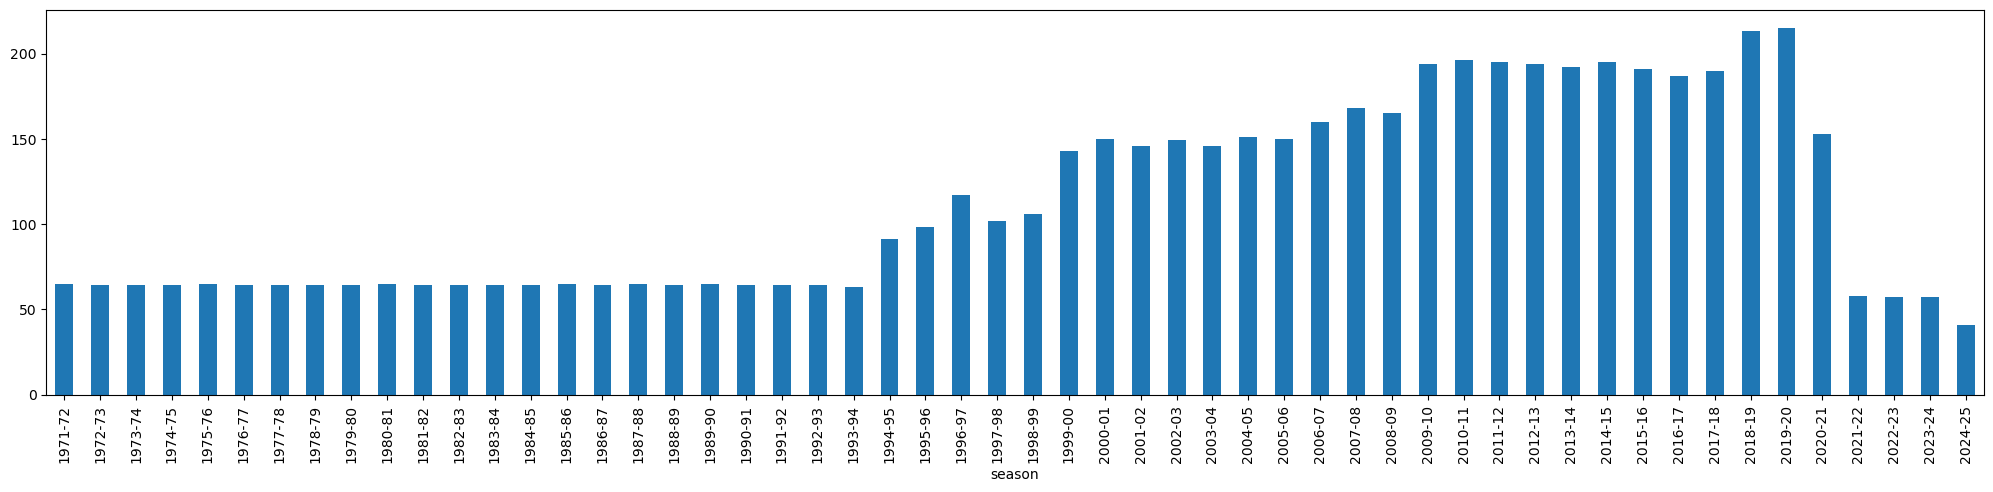

In [436]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [437]:
df.to_csv(os.path.join('data','matches.csv'), index=False)